# R Project on Student Performance Predictions

## Eileen Bluemel

## October 2025

## Introduction

For my dataset, I decided to choose one from Kaggle. Please refer to the following link: https://www.kaggle.com/datasets/haseebindata/student-performance-predictions. It has 12 variables and 10,000 observations and is therefore valid for the purpose of this project. Please refer to the 12 variables and a quick description of them below in my created table.

| Column | Description |
|----------------|----------------|
| StudentID              | Unique identifier for each student.            |
| Name              | Randomly generated student name.           |
| Gender              | Gender of the student (Male / Female).          |
| AttendanceRate             | Percentage of classes attended.          |
| StudyHoursPerWeek             | Hours spent studying weekly.          |
| PreviousGrade             | Grade from the previous semester (out of 100).           |
| ExtracurricularActivities             | Number of extracurricular activities.          |
| ParentalSupport             | Level of parental support (High / Medium / Low).          |
| FinalGrade             | Final grade (out of 100) — Target variable for prediction.           |
| Study Hours             | Daily study hours           |
| Attendance (%)             | Attendance percentage in numeric form            |
| Online Classes Taken            | Whether the student has attended online classes (True / False).          |

The goal of my project is to analyze this data set based on the target variable final grade. I want to explore whether different variables have an influence on the student`s final grade, like the attendance rate, parental support etc. In my exploratory data analysis, I want to see how the final grades are distributed and which variables influence the final grade.

Is there a relationship between parental support and final grade? Do study hours influence final grade? How about attendance? There are many questions that I aspire to answer.

The goal in the end is to use my conclusions to help prepare students for how to best get a good grade.

Use of AI: For this project, I mainly did code on myself. Whenever I encountered errors, I tried looking at class notes and when that did not help, I refered to AI in order to improve small errors. All ideas and processes for this project are my own.

## Task 1: Tibbles and Data Manipulation:

In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


At first, I started the tidyverse as always and then I loaded my chosen data as a csv file into Google Colab.

In [4]:
performance_data <- read_csv("/content/student_performance_updated_1000.csv")

Rows: 1000 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Name, Gender, ParentalSupport
dbl (8): StudentID, AttendanceRate, StudyHoursPerWeek, PreviousGrade, Extrac...
lgl (1): Online Classes Taken

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Then, I am looking at the first few rows of my data to get an overview of it. The student performance dataset evaluates student grades by looking at their study behavior, attendance and extracurricular activities.

In [5]:
head(performance_data)

StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>
1,John,Male,85,15,78,1,High,80,4.8,59,FALSE
2,Sarah,Female,90,20,85,2,Medium,87,2.2,70,TRUE
3,Alex,Male,78,10,65,0,Low,68,4.6,92,FALSE
4,Michael,Male,92,25,90,3,High,92,2.9,96,FALSE
5,Emma,Female,NA,18,82,2,Medium,85,4.1,97,TRUE
6,Olivia,Female,95,30,88,1,High,NA,2.8,97,FALSE


Now, I am converting my data into a tibble which is nicer to work with here.

In [6]:
performace_tibble <- as_tibble(performance_data)

Then, I am making sure that all column names are the same. Until now, some have spaces and some do not. I am using the janitor function which helps me clean them faster. This makes all of them with underscores and no spaces. To be transparent here, I had to consult with an AI in order to get that done quickly, so that I can focus on my EDA faster.

In [7]:
install.packages("janitor")
library(janitor)

performance_tibble_clean <- performace_tibble %>%
  clean_names()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




By looking at the cleaned tibble, I can see that all names are cleaned now.

In [8]:
head(performance_tibble_clean)

student_id,name,gender,attendance_rate,study_hours_per_week,previous_grade,extracurricular_activities,parental_support,final_grade,study_hours,attendance_percent,online_classes_taken
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>
1,John,Male,85,15,78,1,High,80,4.8,59,FALSE
2,Sarah,Female,90,20,85,2,Medium,87,2.2,70,TRUE
3,Alex,Male,78,10,65,0,Low,68,4.6,92,FALSE
4,Michael,Male,92,25,90,3,High,92,2.9,96,FALSE
5,Emma,Female,NA,18,82,2,Medium,85,4.1,97,TRUE
6,Olivia,Female,95,30,88,1,High,NA,2.8,97,FALSE


Next, I am going to handle missing values. To do that, I start by looking at all columns and checking how many are na meaning missing. Then, by using sapply, I check if my variables are numeric or characters. This is because for all numerics, I am going to use the mean in order to replace the na. The average is a good way to get a number that would make sense here. For the characters, I will replace na with Unknown to make sure that we do not have the data. I do not want to just drop the rows because I do not want to lose any other data that could be important.

In [9]:
colSums(is.na(performance_tibble_clean))


student_id                       name 
                        40                         34 
                    gender            attendance_rate 
                        48                         40 
      study_hours_per_week             previous_grade 
                        50                         33 
extracurricular_activities           parental_support 
                        43                         22 
               final_grade                study_hours 
                        40                         24 
        attendance_percent       online_classes_taken 
                        41                         25

In [10]:
sapply(performance_tibble_clean, class)

student_id                       name 
                 "numeric"                "character" 
                    gender            attendance_rate 
               "character"                  "numeric" 
      study_hours_per_week             previous_grade 
                 "numeric"                  "numeric" 
extracurricular_activities           parental_support 
                 "numeric"                "character" 
               final_grade                study_hours 
                 "numeric"                  "numeric" 
        attendance_percent       online_classes_taken 
                 "numeric"                  "logical"

In [11]:
performance_tibble_clean <- performance_tibble_clean %>%
  mutate(
    across(
      .cols = c(attendance_rate, study_hours_per_week, previous_grade, extracurricular_activities, final_grade, study_hours, attendance_percent, online_classes_taken),
      .fns = ~ ifelse(is.na(.x), mean(.x, na.rm = TRUE), .x)
    )
  )

In [12]:
performance_tibble_clean <- performance_tibble_clean %>%
  mutate(
    across(
      .cols = c(name, gender, parental_support),
      .fns = ~ replace_na(.x, "Unknown")
    )
  )

For student_id, it is numerical, but I do not want to treat it like this and use the mean because, yes, these are numbers, but they should be thought of as a character because it only is an identifier. Since data without an unique identifier is not too useful, I decide to drop these.

In [13]:
performance_tibble_clean <- performance_tibble_clean %>%
  filter(!is.na(student_id))

In [14]:
colSums(is.na(performance_tibble_clean))

student_id                       name 
                         0                          0 
                    gender            attendance_rate 
                         0                          0 
      study_hours_per_week             previous_grade 
                         0                          0 
extracurricular_activities           parental_support 
                         0                          0 
               final_grade                study_hours 
                         0                          0 
        attendance_percent       online_classes_taken 
                         0                          0

Now, there are no more missing values.

As a next step, I am going to make my data better by using 5 dplyr verbs, pipes and saving this as a new csv.

In [15]:
#I start by selecting all variables except for the name to make the analysis anonymous.
#This is helpful so that the results can be presented without showing the names of the students.
performance_tibble_clean <- performance_tibble_clean %>%
  select(student_id, gender, attendance_rate, study_hours_per_week,
         previous_grade, extracurricular_activities, parental_support, final_grade, study_hours, attendance_percent, online_classes_taken)

In [16]:
#Next, I noticed that some attendance rates exceed 100% which cannot be possible.
#So, I decided to filter that I can only look at data that has attendance rate and attendance percent between 0 and 100%.
#Additionally, I already saw that some study hours were negative by glancing at the data which also cannot be the case.
#This is why I decided to include in my filter to look at data only with 0 or positive study hours.
performance_tibble_clean <- performance_tibble_clean %>%
  filter(
    attendance_rate > 0, attendance_rate <= 100,
    attendance_percent > 0, attendance_percent <= 100,
    study_hours >= 0
  )

In [17]:
#Here, I will mutate to create a new column which can be helpful for interpretation which is an engagement score.
#The higher the engagement score, the more engaged in classes and studying a student is. This could help to predict the final grades.
performance_tibble_clean <- performance_tibble_clean %>%
  mutate(
    engagement_score = (attendance_rate/100) * study_hours_per_week)
head(performance_tibble_clean)

student_id,gender,attendance_rate,study_hours_per_week,previous_grade,extracurricular_activities,parental_support,final_grade,study_hours,attendance_percent,online_classes_taken,engagement_score
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Male,85.00000,15,78,1,High,80.00000,4.8,59,0,12.75000
2,Female,90.00000,20,85,2,Medium,87.00000,2.2,70,1,18.00000
3,Male,78.00000,10,65,0,Low,68.00000,4.6,92,0,7.80000
4,Male,92.00000,25,90,3,High,92.00000,2.9,96,0,23.00000
5,Female,85.51042,18,82,2,Medium,85.00000,4.1,97,1,15.39188
6,Female,95.00000,30,88,1,High,80.03021,2.8,97,0,28.50000


In [18]:
#Next, I am making the parental support as a factor to make sure the order is clear.
performance_tibble_clean <- performance_tibble_clean %>%
  mutate(
    parental_support = factor(parental_support,
                              levels = c("Low", "Medium", "High"),
                              ordered = TRUE))

In [19]:
#Further, I will order by data by the top students final grades first.
performance_tibble_clean %>%
  arrange(desc(final_grade)) %>%
  head(6)

student_id,gender,attendance_rate,study_hours_per_week,previous_grade,extracurricular_activities,parental_support,final_grade,study_hours,attendance_percent,online_classes_taken,engagement_score
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,Male,92.00000,25.00000,90,3,High,92,2.9,96,0,23.00000
8573,Female,88.00000,12.00000,90,1,High,92,4.1,70,0,10.56000
3705,Female,85.51042,17.63053,60,3,Low,92,3.6,75,0,15.07594
1152,Female,91.00000,22.00000,85,2,Low,92,2.5,58,0,20.02000
3900,Female,85.00000,10.00000,88,0,Low,92,1.3,100,1,8.50000
8461,Female,91.00000,25.00000,60,1,Medium,92,0.7,94,1,22.75000


In [20]:
#I can do a whole lot with this data.
#For example, grouping by gender and looking at the average final grade, the average study hours and the average engagement score and seeing how many females, males and unknown we have.
#I am only rounding here since I am displaying the data after summarising to make it more easily interpretable.
performance_tibble_clean %>%
  group_by(gender) %>%
    summarise(
     mean_final = round(mean(final_grade),2),
      mean_study_hours = round(mean(study_hours_per_week),2),
      mean_engagement_score = round(mean(engagement_score),2),
      n = n()
             )

gender,mean_final,mean_study_hours,mean_engagement_score,n
<chr>,<dbl>,<dbl>,<dbl>,<int>
Female,80.49,17.69,15.16,434
Male,79.97,17.40,14.86,471
Unknown,77.87,18.01,15.66,45


In [21]:
#All together in a pipe
performance_tibble_clean <- performance_tibble_clean %>%
  select(student_id, gender, attendance_rate, study_hours_per_week,
         previous_grade, extracurricular_activities, parental_support,
         final_grade, study_hours, attendance_percent, online_classes_taken) %>%
  filter(
    attendance_rate > 0, attendance_rate <= 100,
    attendance_percent > 0, attendance_percent <= 100,
    study_hours >= 0
  ) %>%
  mutate(
    engagement_score = (attendance_rate/100) * study_hours_per_week,
    parental_support = factor(parental_support, levels = c("Low", "Medium", "High"), ordered = TRUE)
  ) %>%
  arrange(desc(final_grade)) %>%
  group_by(gender)

#To be honest, I understand the pipes are helpful. But especially in the thinking process, for me personally, it is easier writing it one by one.

In [22]:
#Now I will save a csv with my changes
write_csv(performance_tibble_clean, "performance_tibble_clean.csv")

## Task 2: Control Flow and Functions:

I'll start with an if statement and make a new column to categorize the engagement level in high, medium and low. This can be used for evaluations later on.

In [23]:
performance_tibble_clean <- performance_tibble_clean %>%
  mutate(
    engagement_level = ifelse(
      engagement_score >= 20, "High",
      ifelse(engagement_score >= 10, "Medium", "Low")))
head(performance_tibble_clean)

student_id,gender,attendance_rate,study_hours_per_week,previous_grade,extracurricular_activities,parental_support,final_grade,study_hours,attendance_percent,online_classes_taken,engagement_score,engagement_level
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4,Male,92.00000,25.00000,90,3,High,92,2.9,96,0,23.00000,High
8573,Female,88.00000,12.00000,90,1,High,92,4.1,70,0,10.56000,Medium
3705,Female,85.51042,17.63053,60,3,Low,92,3.6,75,0,15.07594,Medium
1152,Female,91.00000,22.00000,85,2,Low,92,2.5,58,0,20.02000,High
3900,Female,85.00000,10.00000,88,0,Low,92,1.3,100,1,8.50000,Low
8461,Female,91.00000,25.00000,60,1,Medium,92,0.7,94,1,22.75000,High


Next, I will use a for loop to automatially calulate the means of my numeric attributes. This is helpful for comparisons later on.

In [24]:
numerics <- c("attendance_rate", "study_hours_per_week", "previous_grade", "extracurricular_activities", "final_grade", "study_hours", "attendance_percent", "online_classes_taken", "engagement_score")
numerics_means <- c()  # empty vector to store means

for (col in numerics) {
  numerics_means[col] <- mean(performance_tibble_clean[[col]])}

print(numerics_means)


           attendance_rate       study_hours_per_week 
                85.5588487                 17.5609429 
            previous_grade extracurricular_activities 
                77.7336450                  1.5161426 
               final_grade                study_hours 
                80.1085768                  2.4755298 
        attendance_percent       online_classes_taken 
                76.0578179                  0.5059919 
          engagement_score 
                15.0374857 


In [25]:
#I can also use a while loop
i <- 1
while (i <= length(numerics)) {
  print(paste("Mean of", numerics[i], "=", mean(performance_tibble_clean[[numerics[i]]])))
  i <- i + 1
}

[1] "Mean of attendance_rate = 85.5588486842105"
[1] "Mean of study_hours_per_week = 17.5609429362881"
[1] "Mean of previous_grade = 77.7336450225875"
[1] "Mean of extracurricular_activities = 1.5161425507342"
[1] "Mean of final_grade = 80.108576754386"
[1] "Mean of study_hours = 2.47552976704055"
[1] "Mean of attendance_percent = 76.0578179024203"
[1] "Mean of online_classes_taken = 0.505991902834008"
[1] "Mean of engagement_score = 15.037485716759"


Lastly, I will use a custom function to get summary plots for different categorical variables. In this case, I will plot gender and parental support and engagement level, each for final grade.

In [26]:
#Here, I noticed that gender and engagement level are characters and not factors.
#For ggplot, I need them as a factor, so I will transform them.
str(performance_tibble_clean$gender)
str(performance_tibble_clean$parental_support)
str(performance_tibble_clean$engagement_level)


 chr [1:950] "Male" "Female" "Female" "Female" "Female" "Female" "Male" ...
 Ord.factor w/ 3 levels "Low"<"Medium"<..: 3 3 1 1 1 2 1 1 1 NA ...
 chr [1:950] "High" "Medium" "Medium" "High" "Low" "High" "Medium" "High" ...


In [27]:
performance_tibble_clean <- performance_tibble_clean %>%
  mutate(
    gender = factor(gender),
    engagement_level = factor(engagement_level,
                              levels = c("Low", "Medium", "High"),
                              ordered = TRUE))

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


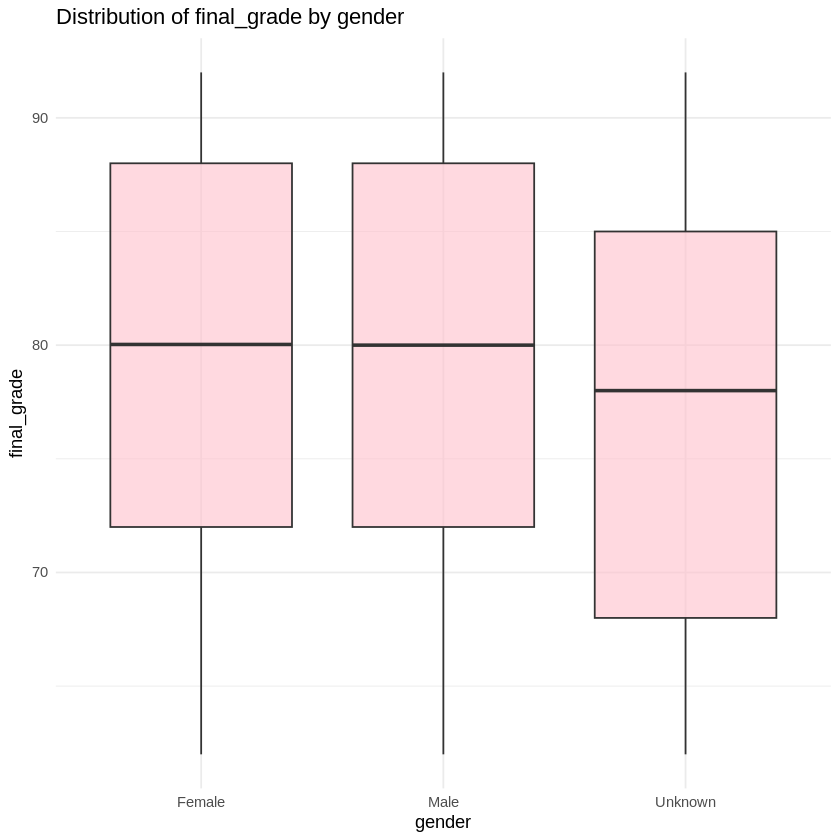

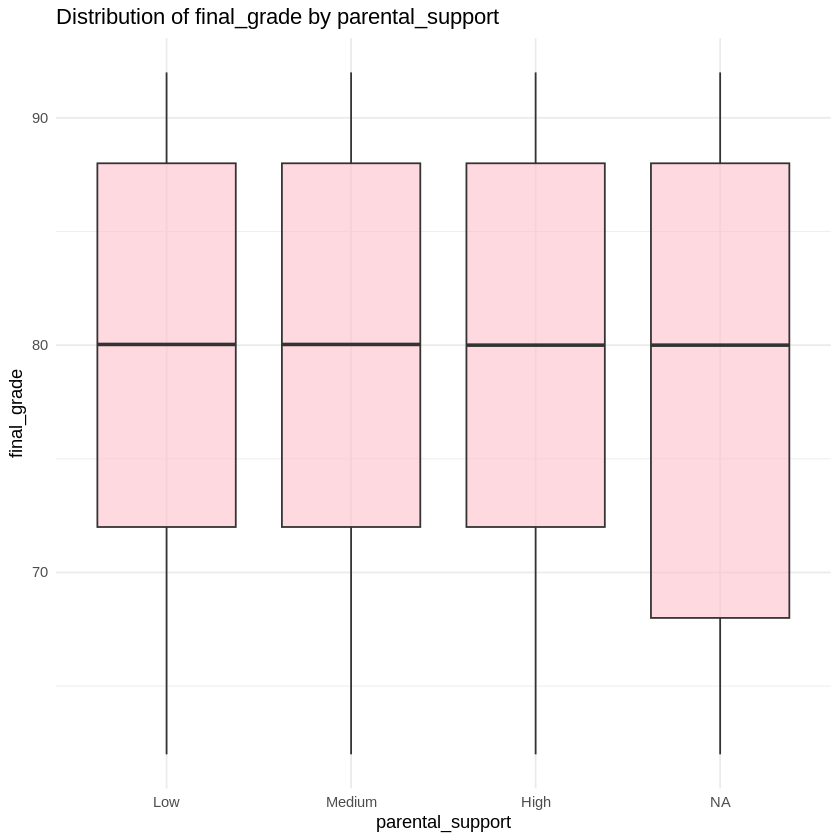

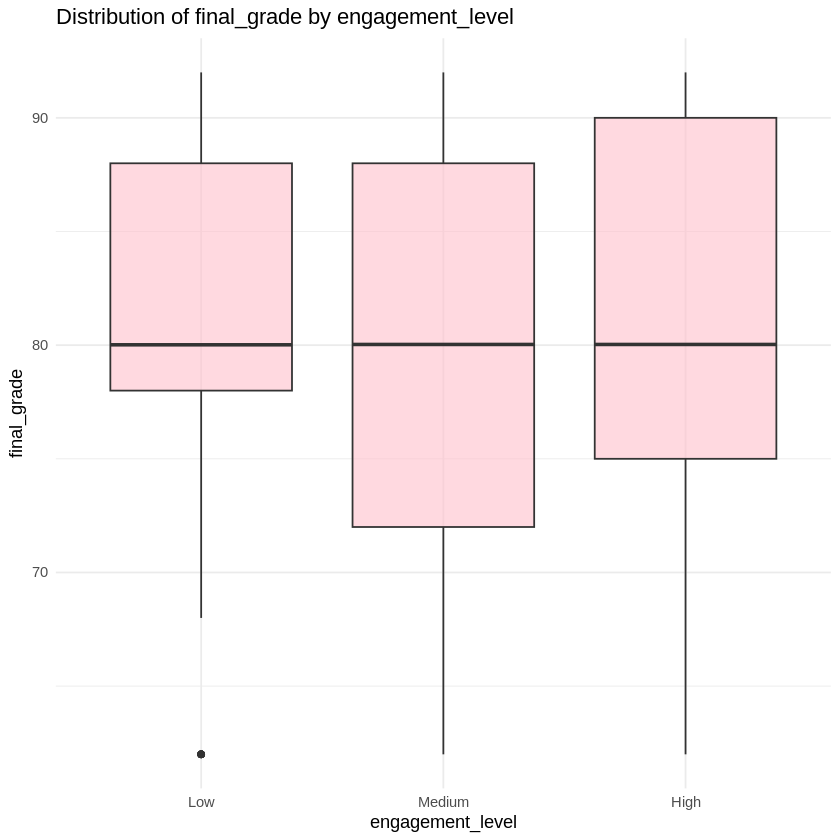

In [28]:
library(ggplot2)

summary_plot <- function(df, cat_var, num_var = "final_grade") {
  ggplot(df, aes_string(x = cat_var, y = num_var)) +
    geom_boxplot(fill = "pink", alpha = 0.6) +
    labs(title = paste("Distribution of", num_var, "by", cat_var),
         x = cat_var,
         y = num_var) +
    theme_minimal()}

summary_plot(performance_tibble_clean, "gender")
summary_plot(performance_tibble_clean, "parental_support")
summary_plot(performance_tibble_clean, "engagement_level")


## Task 3: Exploratory Data Analysis:

In this section, I will explore the student performance dataset with firstly a focus on variation and later on a focus on covariation. My goal is to see patterns, outliers and relationships with a focus on the final grade.

I`m going to start with exploration of variation of single variables with:

*   histograms, densities and boxplots for numerical variables,
*   bar charts for categorical variables and
*   identifying and handling outliers.


In [29]:
head(performance_tibble_clean)

student_id,gender,attendance_rate,study_hours_per_week,previous_grade,extracurricular_activities,parental_support,final_grade,study_hours,attendance_percent,online_classes_taken,engagement_score,engagement_level
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
4,Male,92.00000,25.00000,90,3,High,92,2.9,96,0,23.00000,High
8573,Female,88.00000,12.00000,90,1,High,92,4.1,70,0,10.56000,Medium
3705,Female,85.51042,17.63053,60,3,Low,92,3.6,75,0,15.07594,Medium
1152,Female,91.00000,22.00000,85,2,Low,92,2.5,58,0,20.02000,High
3900,Female,85.00000,10.00000,88,0,Low,92,1.3,100,1,8.50000,Low
8461,Female,91.00000,25.00000,60,1,Medium,92,0.7,94,1,22.75000,High


### Question 1 (Variation): How does the distribution of the final grade look like?

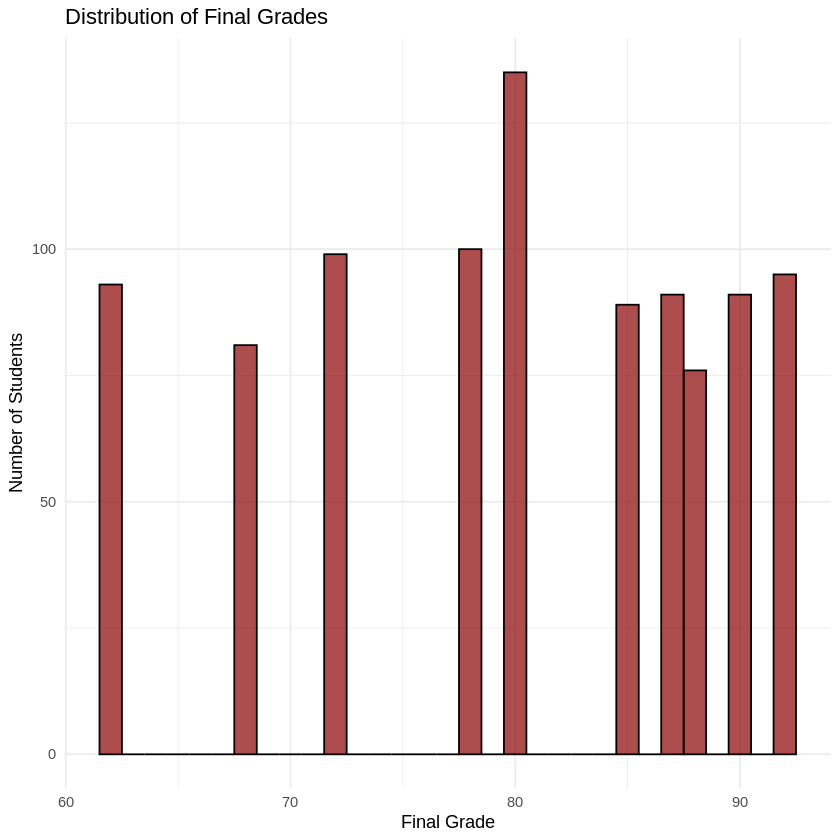

In [30]:
ggplot(performance_tibble_clean, aes(x = final_grade)) +
  geom_histogram(binwidth = 1, alpha = 0.7, color = "black", fill = "dark red") +
    theme_minimal() +
      labs(title = "Distribution of Final Grades", x = "Final Grade", y = "Number of Students")

I can clearly see that the distribution of the final grade is spread out, with minimal grades in the low 60s and maximal grades in the high 90s. The number of students is pretty similar with about 80-90 students for all grades reflected in the histogram. However, it does appear that a pretty high group of almost 140 students has exactly 80 as a final grade. This is the biggest student group. This shows that while their are struggling students and very good students, a large majority has an 80 as a final grade.

Next, I will move on with some explorative questions for covariation.

### Question 2 (Variation): Are there students heavily skipping classes (which could influence their final grade), meaning are there outliers in the attendance rate?

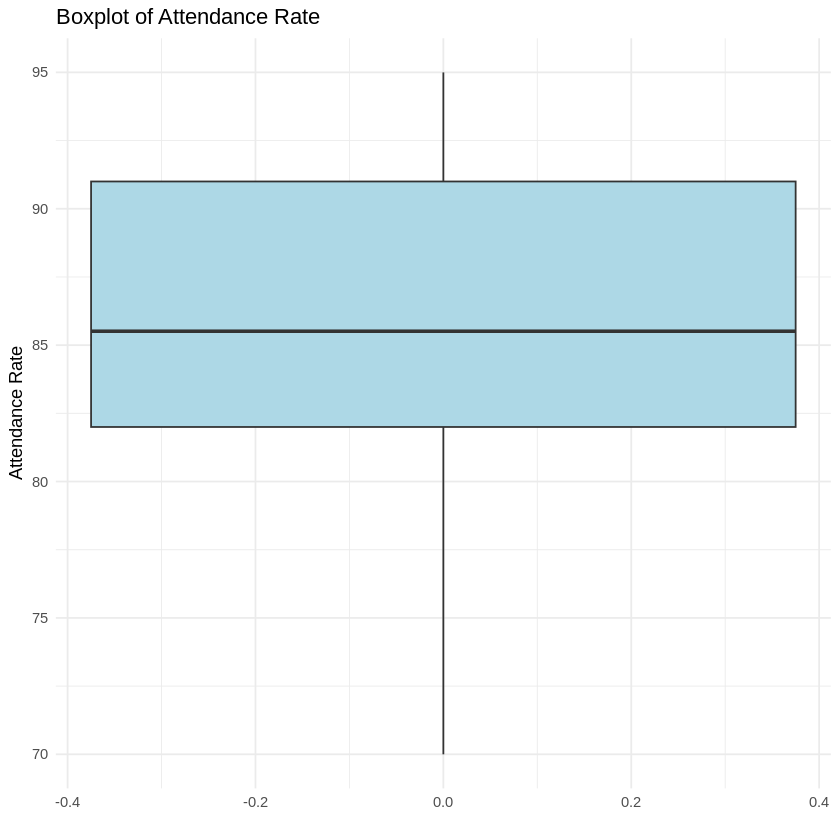

In [31]:
ggplot(performance_tibble_clean, aes(x = attendance_rate)) +
  geom_boxplot(fill = "light blue") +
    coord_flip() +
      theme_minimal () +
        labs(title = "Boxplot of Attendance Rate", x = "Attendance Rate", y = "")

I can see that the attendance rate of students ranges from 70 to 95%. It is to mention that the middle 50% of the students have an attendance rate of about 82% to 92%. The median attendance rate is slighty above 85%. There are no outliers in my data, meaning that there are no students that are there in every class and no students that are heavily skipping classes.

### Question 3 (Variation): How do study hours per week vary between the students?

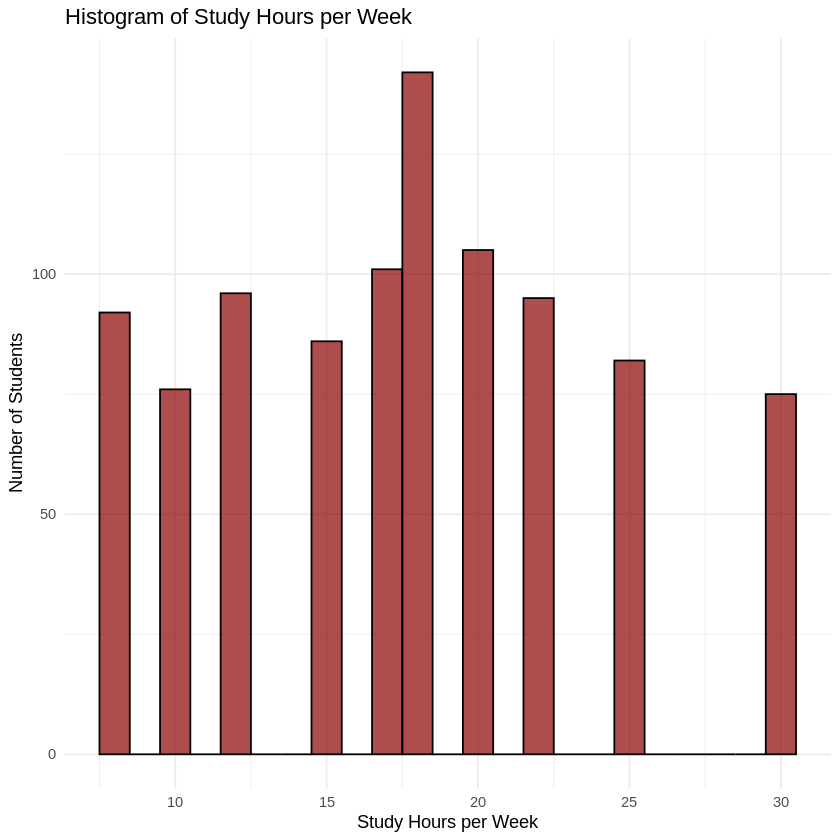

In [32]:
ggplot(performance_tibble_clean, aes(x =study_hours_per_week)) +
  geom_histogram(binwidth = 1, alpha = 0.7, color = "black", fill = "dark red") +
    theme_minimal() +
      labs(title = "Histogram of Study Hours per Week", x = "Study Hours per Week", y = "Number of Students")

The histogram shows me the distribution of the study hours per week with the number of students. I can see that it ranges from 5 hours per week to 30 hours per week. However, only about 75 students really study for 30 hours a week. The majority seems to be studying aroung 18 hours a week.

This actually leads me to my next question for covariance. How are study hours per week and final grade related? Do the 75 students thatr study 30 hours a week really get the best grades or is too much studying not beneficial?

### Question 4 (Covariation): Do the weekly study hours influence the final grades?



`geom_smooth()` using formula = 'y ~ x'


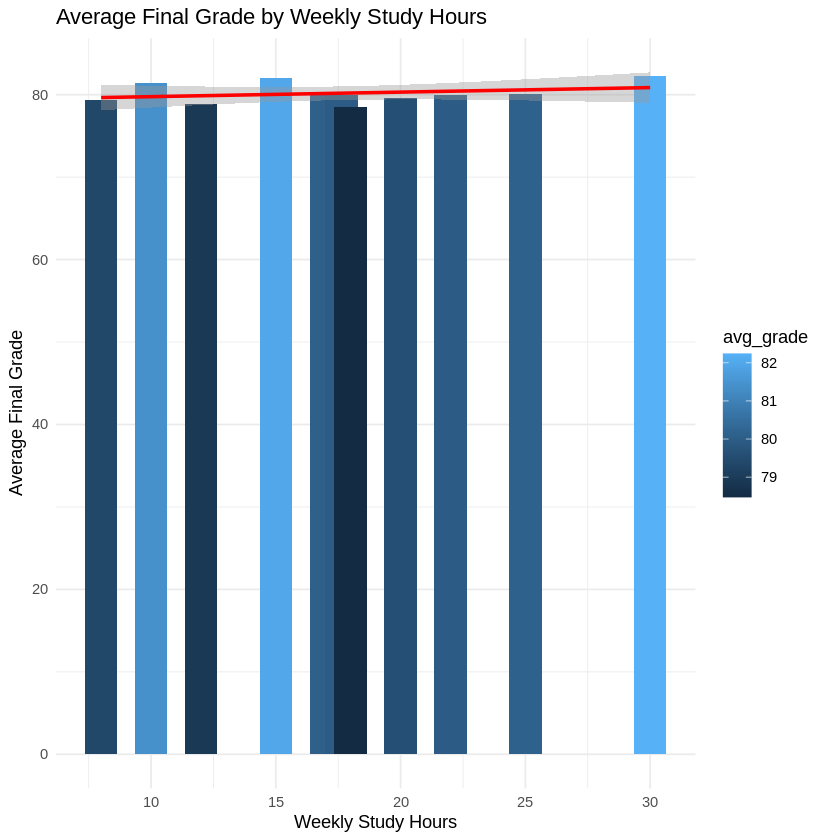

In [33]:
avg_grades <- performance_tibble_clean %>%
  group_by(study_hours_per_week) %>%
  summarise(avg_grade = mean(final_grade))

ggplot(avg_grades, aes(x = study_hours_per_week, y = avg_grade)) +
  geom_col(aes(fill = avg_grade), width = 1.3) +
    theme_minimal() +
      geom_smooth(method = "lm", color = "red", se = TRUE) +
        labs(title = "Average Final Grade by Weekly Study Hours", x = "Weekly Study Hours", y = "Average Final Grade")

Since the smooth line has a slightly upward trend, I assume that study hours do have an influence on the final grade, but only very slightly. This means that the effect of studying more does not much influence the final grade in this data set. If it is not the amount of hours studies per week that mostly explains the final grade, I will look at other variables, for example the support from at home.

### Question 5 (Covariation): Are students with high parental support getting better final grades?

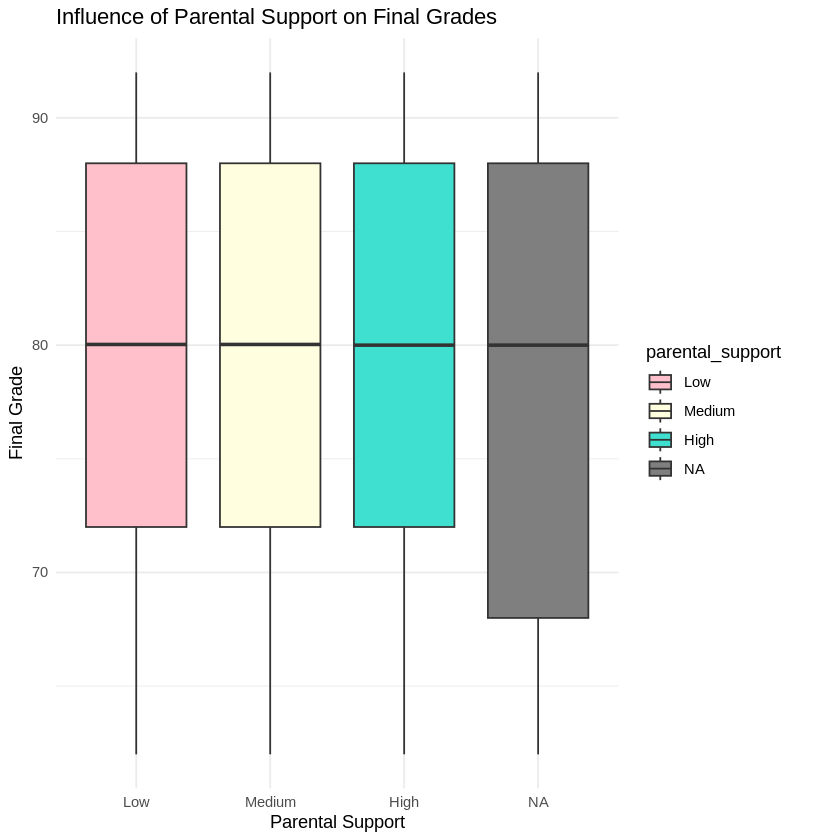

In [61]:
ggplot(performance_tibble_clean, aes(x = parental_support, y = final_grade, fill = parental_support)) +
  geom_boxplot() +
    theme_minimal() +
      scale_fill_manual(values = c(
      "Low" = "pink",
      "Medium" = "light yellow",
      "High" = "turquoise")) +
        labs(title = "Influence of Parental Support on Final Grades", x= "Parental Support", y = "Final Grade")

It does seem like there could be a mistake in my approach since all three boxplots look the same with the same size and the same median. However, it could also be the case that parental support actually does **not** have an influence on their children`s final grade. Let me explore this with looking at the variation with the averages of all three categories (low, medium and high support) to be sure.

In [35]:
performance_tibble_clean %>%
  group_by(parental_support) %>%
  summarise(median_grade = median(final_grade), mean_grade = mean(final_grade), number_of_students = n())

parental_support,median_grade,mean_grade,number_of_students
<ord>,<dbl>,<dbl>,<int>
Low,80.03021,80.38470,292
Medium,80.03021,80.61427,310
High,80.00000,79.46603,327
NA,80.00000,78.80952,21


I conclude for my question if parental support influences the children`s final grade, that, in fact, parental support does really not influence the final grade in this data set. This can be seen in the boxplot as well as here, since the medians and the averages are so close together in all three categories of parental support. Since neither study hours per week nor parental support strongly explain final grades, I will now look at the engagement level.

### Question 6 (Covariation): Are students with high engagement levels (study hours per week and attendance) getting better final grades?

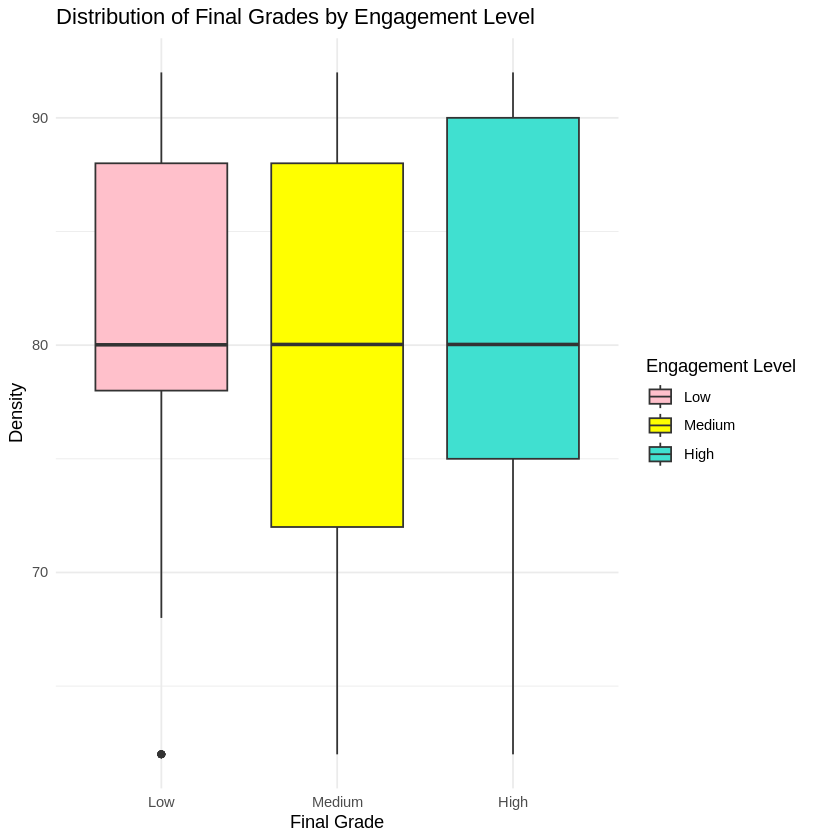

In [36]:
ggplot(performance_tibble_clean, aes(x = engagement_level, y = final_grade, fill = engagement_level)) +
  geom_boxplot() +
    theme_minimal() +
      scale_fill_manual(values = c("Low" = "pink", "Medium" = "yellow", "High" = "turquoise")) +
        labs(title = "Distribution of Final Grades by Engagement Level", x = "Final Grade", y = "Density", fill = "Engagement Level")


It still does show that all median final grades are the same which means that on average, the engagement level does not show a big difference in final grades. The middle 50% of students does appear to have a wider spread for medium and high engagement levels compared to low engagement levels.
The is one clear outlier in the pink boxplot which means that one student with a low engagement level did score a very low grade.

In general, the boxplot does not show a strong difference in final grades based on engagement level. Now, I will look at only attendance rate to see if that has an influence on the final grades.

### Question 7 (Covariation): Does the attendance rate alone influence the final grades?

`geom_smooth()` using formula = 'y ~ x'


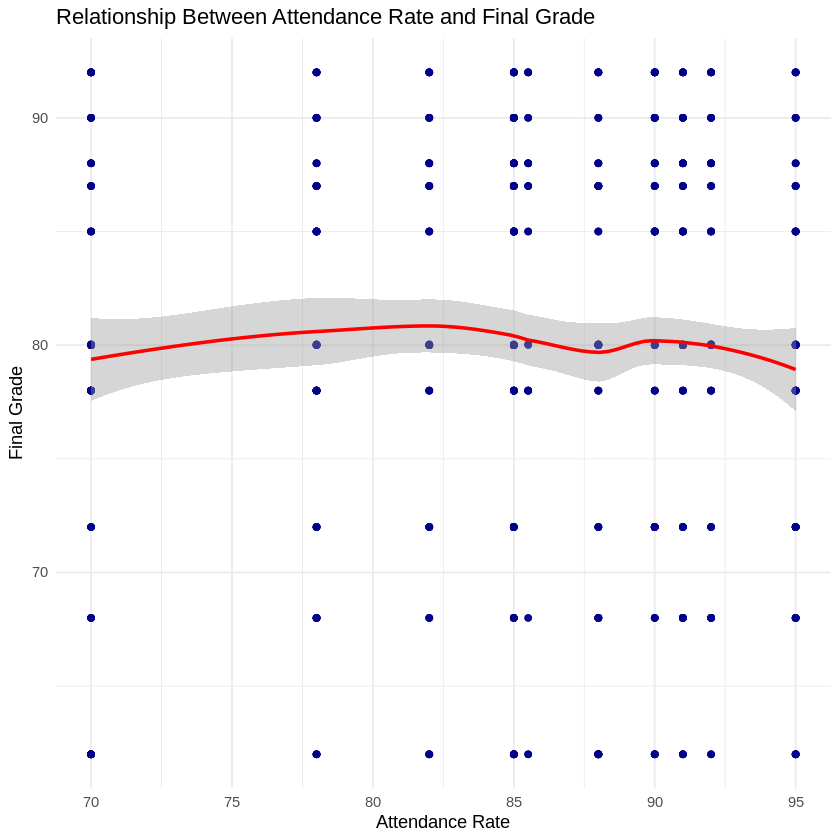

In [59]:
ggplot(performance_tibble_clean, aes(x = attendance_rate, y = final_grade)) +
  geom_point(alpha = 0.8, color = "dark blue") +
    geom_smooth(method = "loess", color = "red") +
      theme_minimal() +
        labs(title = "Relationship Between Attendance Rate and Final Grade", x = "Attendance Rate", y = "Final Grade")

The scatterplot shows that there is not really an influence of the attendance rate on the final grade.
Next, I want to look at the differences in gender for final grades.

### Question 8 (Covariation): Does gender influence the final grades?

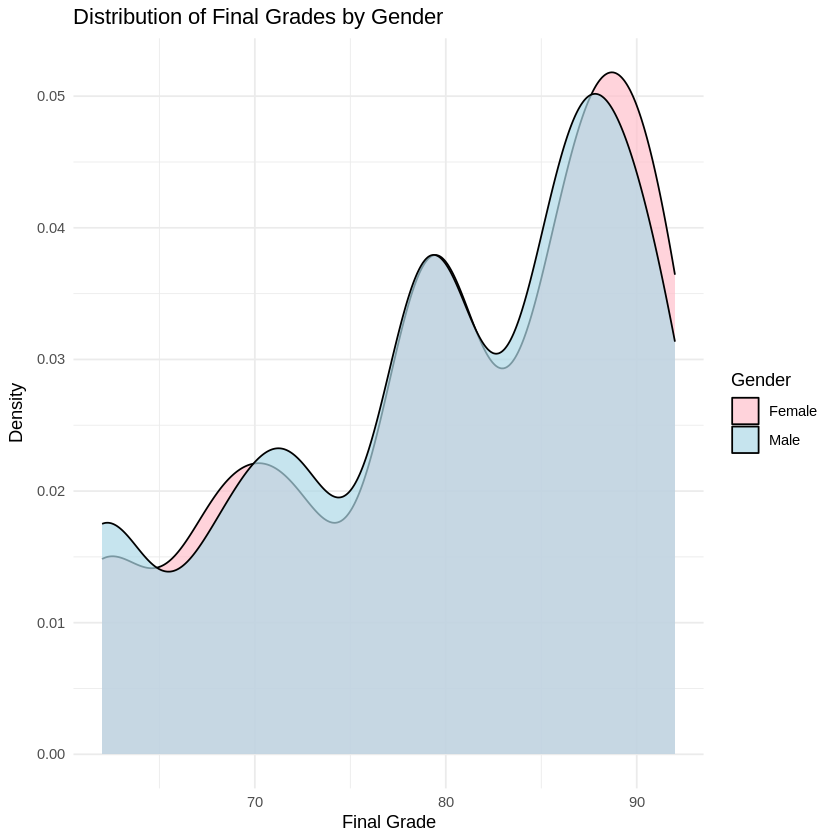

In [38]:
performance_tibble_clean %>%
  filter(gender != "Unknown") %>%
    ggplot(aes(x = final_grade, fill = gender)) +
      geom_density(alpha = 0.7) +
        theme_minimal() +
          scale_fill_manual(values = c("Male" = "lightblue", "Female" = "pink")) +
            labs(title = "Distribution of Final Grades by Gender", x = "Final Grade", y = "Density", fill = "Gender")

Since both densities overlap mostly, I see that there is no real evidence that gender is influencing the final grades. The peak of the density plots is between 80 and 90 and shows that both boys and girls do achieve good to very good grades. The female curve is slightly higher on the right which indicates that females might get slightly more better grades. however, this is only very minimal. Next, I want to look at extracurriculars. Could it be that if students focus more on their sports and hobbies, their final grades drop?

###Question 9 (Covariation): Do extracurriculars influence the final grades?

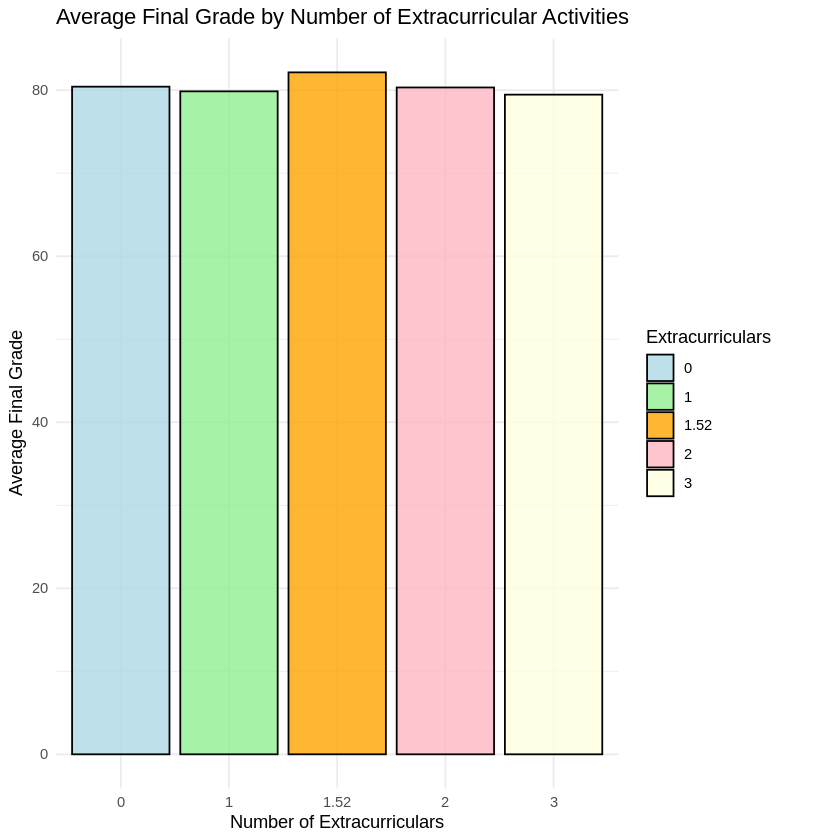

In [39]:
performance_tibble_clean %>%
  mutate(extracurricular_activities = round(extracurricular_activities, 2)) %>%
    group_by(extracurricular_activities) %>%
      summarise(mean_grade = mean(final_grade)) %>%
        ggplot(aes(x = factor(extracurricular_activities), y = mean_grade, fill = factor(extracurricular_activities))) +
          geom_col(alpha = 0.8, color = "black") +
            theme_minimal() +
              scale_fill_manual(values = c("0" = "lightblue", "1" = "lightgreen", "1.52" = "orange", "2" = "lightpink", "3" = "lightyellow")) +
                labs(title = "Average Final Grade by Number of Extracurricular Activities", x = "Number of Extracurriculars", y = "Average Final Grade", fill = "Extracurriculars")

I can see that the number of extracurriculars does not really influence the final grade, as all bars have a very similar height. I can see that the best grades have students that have on average 1.52 extracurriculars. So, I can tell that it is beneficial for students to have some hobbies outside of school, however, not too many. Lastly, I want to explore if online classes influence students final grades.

###Question 10 (Covariation): Do online classes influence the final grades?

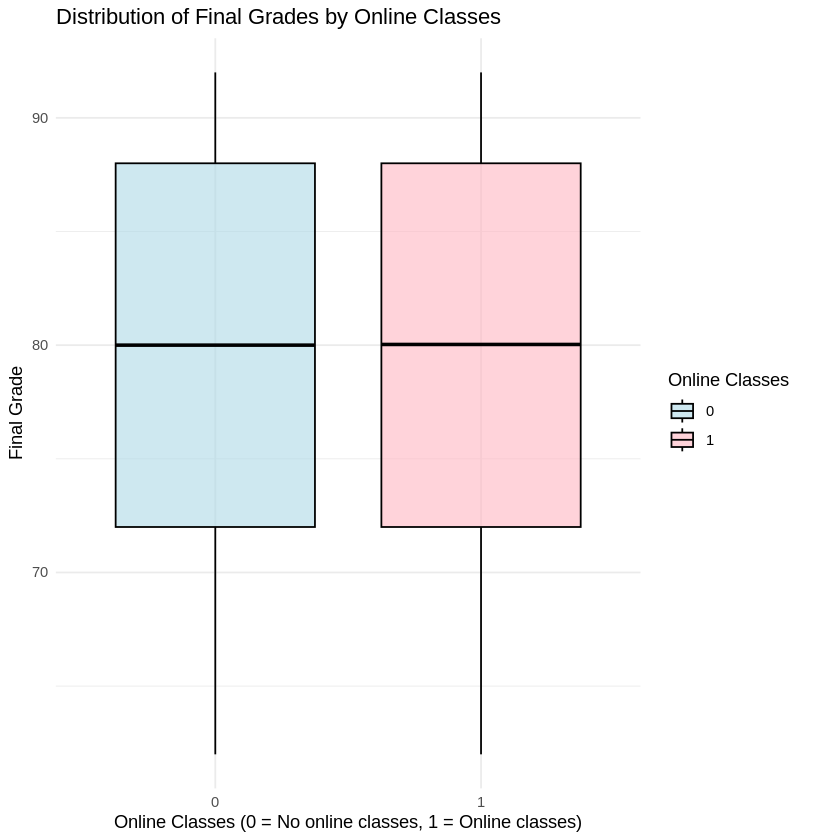

In [40]:
performance_tibble_clean <- performance_tibble_clean %>%
  mutate(online_classes_taken = ifelse(online_classes_taken >= 0.5, 1, 0))

ggplot(performance_tibble_clean, aes(x = factor(online_classes_taken), y = final_grade, fill = factor(online_classes_taken))) +
  geom_boxplot(alpha = 0.6, color = "black") +
    theme_minimal() +
      scale_fill_manual(values = c("0" = "lightblue", "1" = "lightpink")) +
        labs(title = "Distribution of Final Grades by Online Classes", x = "Online Classes (0 = No online classes, 1 = Online classes)", y = "Final Grade", fill = "Online Classes")

Both boxes look very similar, which leads me to think that either there is a mistake, or online classes do not influence the final grade. I will check by looking at the numbers.

In [41]:
performance_tibble_clean %>%
  group_by(online_classes_taken) %>%
    summarise(avg_grade = mean(final_grade), number_of_students = n())

online_classes_taken,avg_grade,number_of_students
<dbl>,<dbl>,<int>
0,80.01193,457
1,80.19816,493


I can conclude that online classes really do have no real influence on the final grade, as for both groups (students without online classes and with online classes) the average grade returns as almost the same (80).

Now, I want to look at the difference for study hours and gender and will use a facet wrap, maybe this gives me more insights.

###Question 11 (Covariation): Do the study hours per week influence the final grades, by looking at it by gender?

`geom_smooth()` using formula = 'y ~ x'


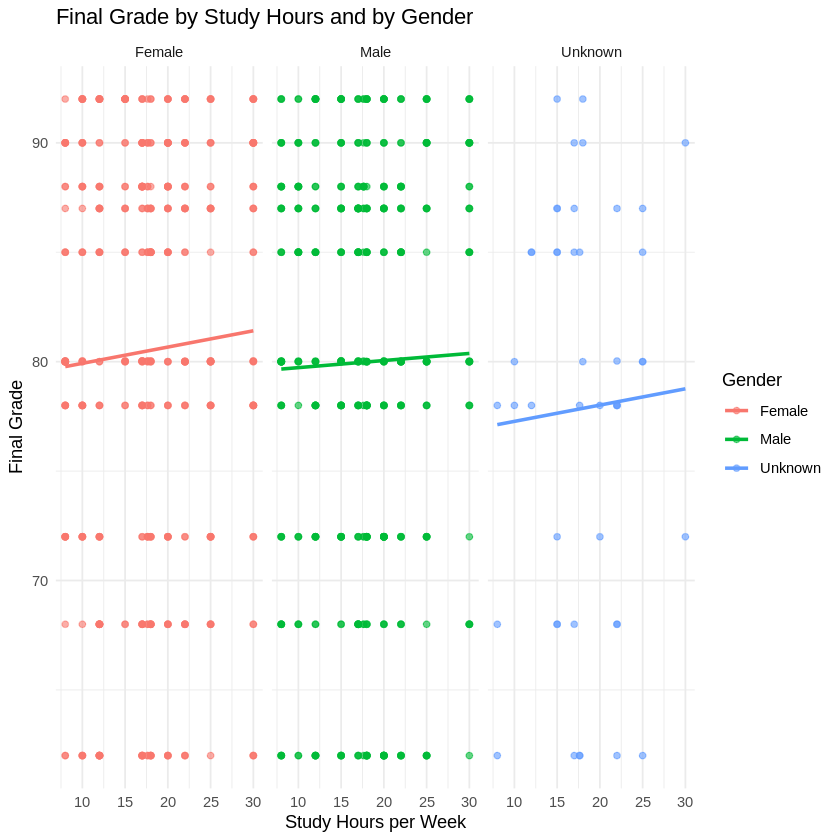

In [68]:
ggplot(performance_tibble_clean, aes(x = study_hours_per_week, y = final_grade, color = gender)) +
  geom_point(alpha = 0.6) +
    geom_smooth(method = "lm", se = FALSE) +
      facet_wrap(~ gender) +
        theme_minimal() +
          labs(title = "Final Grade by Study Hours and by Gender", x = "Study Hours per Week", y = "Final Grade", color = "Gender")

I can see in my facet wrapped plot that the slope of females in study hours per week for final grade is steeper than for males. Since unknown is not helpful, I will not focus on it here. This graph tells me that for every hour more a girl studies, she has a bigger improevent in her final grade compared to boys. For boys, their slope is positive as well, meaning that for every hour more they study, they will get a better grade. However, for females, study time does appear to get them bigger increases in final grades.

Nonetheless, this correlation does not need to mean it is a causation. There might have been other factors as well that lead to females getting the better grades.

Since almost all analyses show that there is no big influence on final grade, I want to check with what we learned if I just cannot see it in the visuals or if there really is no significance.


In [54]:
m1 <- lm(final_grade ~ gender + attendance_rate + study_hours_per_week + previous_grade + extracurricular_activities + parental_support + study_hours + attendance_percent + online_classes_taken + engagement_score + engagement_level, data = performance_tibble_clean)
summary(m1)


Call:
lm(formula = final_grade ~ gender + attendance_rate + study_hours_per_week + 
    previous_grade + extracurricular_activities + parental_support + 
    study_hours + attendance_percent + online_classes_taken + 
    engagement_score + engagement_level, data = performance_tibble_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.4722  -7.5619   0.4747   7.6442  15.2799 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                84.8515163 12.2673564   6.917 8.67e-12 ***
genderMale                 -0.7297526  0.6312180  -1.156   0.2479    
genderUnknown              -2.5468444  1.4857001  -1.714   0.0868 .  
attendance_rate            -0.1161911  0.1356553  -0.857   0.3919    
study_hours_per_week       -0.4298133  0.6476267  -0.664   0.5071    
previous_grade              0.0006951  0.0314340   0.022   0.9824    
extracurricular_activities -0.1336540  0.3006772  -0.445   0.6568    
parental_support.L         -0

I can conclude that there is no significance after fitting my model for any of the given variables. Interestingly enough, there is small significance for the gender Unknown, which is unfortunately really not helpful for this EDA.

## Findings and Limitations:

In my exploratory data analysis, I can see how different variables such as study hours, attendance rate, gender and parental support are related to final grades of students. I can see that my target variable, which was the final grade, does have little variation, as all students get between 60 and 95 points, while most get around 80 points as a final grade. Therefore, no strong patterns are visible in my data.

While relationships like study hours and grades or engagement and grades are positive, they were weak in general. For example, female students show a slightly steeper positive slope between study hours and grades which shows that their additional study time correlated with bigger final grade improvements compared to boys. However, even these were modest. Other variables like attendance rate, extracurricular activities and parental support did not appear to have a strong influence on final grades.

It is interestingly enough that the data set is not too small, this means that usually it should be easy to see patterns. I would have assumed that especially study hours or engagement level overall would strongly explain final grades, but apparently it does not in this data set. However, the main limitation of this analysis is the low variability in the target variable final grade. This makes it more difficult to see meaningful relationships. Additionally, this dataset was from Kaggle and was created for educational purposes and is not based on real student data. Thererfoe, it might not accurately reflect  complex and real students where I would expect more meaningful relationships.

Even though there is no real significance, I would suggest to repeat this EDA on real-world data and then make recommendations for students on how to improve their final grades.

## Executive Summary:

The explorative data analysis looked at possible variables that could explain the final grades of students. There were many variables examined, including attendance rate, study hours, engagement level, parental support, gender or extracurricular activites. It was found that the dataset is limited due to small variation in the predicted variable final grade and since it was a man-made dataset for educational purposes without using real-life data. Therefore, it was not possible to uncover strong relationships regarding the final grade due to weak correlations.

Nonetheless, some small patterns exist, for example a positive effect of study hours on the final grade, especially for female students. This shows that increased study time might have a slightly bigger impact on the girls’ final grades compared to the boys’ final grades. Some other variables, like gender, parental support, attendance rate or extracurricular activities did not show a clear or consistent correlation.

This dataset shows the importance of using real-world data for meaningful explorations about academic performance and final grades. Real-world data would probably show stronger correlations and could include more variables like student`s backgrounds and maybe different classes or other variables. For future analyses, I recommend repeating this explorative data analysis with real data from schools to make more accurate predictions for students and for making recommendations on how to improve their academic performance.